In [42]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# amacode:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [43]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [44]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [45]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [46]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
 
# Scaling the numeric columns
market_data_scaled = StandardScaler().fit_transform(df_market_data)


In [47]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled)


# Copy the crypto names from the original data
df_market_data_scaled.columns = df_market_data.columns

# Set the coinid column as index
df_market_data_scaled.index = df_market_data.index

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [48]:
# Create a list with the number of k-values from 1 to 11
Kvalues = [1,2,3,4,5,6,7,8,9,10,11]

In [49]:
# Create an empty list to store the inertia values
inertia_val = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list



for k in Kvalues:
    model = KMeans(k) 
    model.fit(df_market_data_scaled)
    inertia_val.append(model.inertia_)

C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [50]:
print(inertia_val)

[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 66.00203846977047, 52.58813698829384, 46.477476311626425, 37.38425217449598, 32.67889912496265, 28.22289929060893, 24.20788852510528]


In [51]:
# Create a dictionary with the data to plot the Elbow curve
inertia_dict = {"x":inertia_val}

# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame(inertia_dict)

In [52]:
inertia_df

,x
0,287.000000
1,195.820218
2,123.190482
3,79.022435
4,66.002038
5,52.588137
6,46.477476
7,37.384252
8,32.678899
9,28.222899


<Axes: >

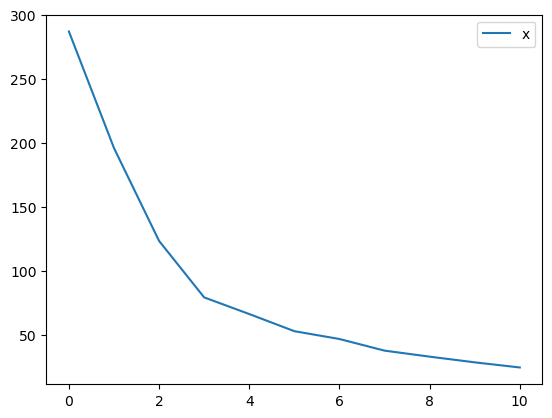

In [53]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
inertia_df.plot()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [54]:
# Initialize the K-Means model using the best value for k
model = KMeans(3) 
    


In [55]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [56]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [57]:
# Create a copy of the DataFrame
df_market_data_scale_copy = df_market_data_scaled.copy()

In [58]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scale_copy["predicted"] = predicted
df_market_data_scale_copy
# Display sample data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [88]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_scale_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols = ["coin_id"],
    by="predicted",
    title = "cryptocurrency"
)

:NdOverlay   [predicted]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [87]:
df_cryto_pca_predictions


,PCA1,PCA2,PCA3,CrytoCluster
coin_id,,,,
bitcoin,-0.458737,0.929075,0.462762,0
ethereum,-0.386833,0.525089,0.952970,0
tether,-0.457751,-0.090974,-0.644363,3
ripple,-0.504507,-0.137660,-0.482747,3
bitcoin-cash,-0.808014,2.202362,1.861748,0
binancecoin,-0.290301,1.448267,0.809842,0
chainlink,-0.379202,0.577688,2.845597,0
cardano,-0.235214,0.769870,1.480473,0
litecoin,-0.574655,0.534372,0.598453,0


---

### Optimize Clusters with Principal Component Analysis.

In [59]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [60]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
cytpoinfo_pca = pca.fit_transform(df_market_data_scale_copy)
# View the first five rows of the DataFrame. 
cytpoinfo_pca[:5]

array([[-0.45873702,  0.92907456,  0.46276177],
       [-0.38683294,  0.52508871,  0.95297029],
       [-0.45775058, -0.09097355, -0.64436307],
       [-0.5045067 , -0.13766044, -0.48274733],
       [-0.80801439,  2.20236181,  1.86174764]])

In [61]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37701473, 0.34354479, 0.17333394])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [66]:
# Create a new DataFrame with the PCA data.
cryto_pca_df = pd.DataFrame(
    cytpoinfo_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)
cryto_pca_df


# Copy the crypto names from the original data
cryto_pca_df["coin_id"] = df_market_data.index
cryto_pca_df
# Set the coinid column as index
cryto_pca_df= cryto_pca_df.set_index("coin_id")
cryto_pca_df
# Display sample data
cryto_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.458737,0.929075,0.462762
ethereum,-0.386833,0.525089,0.952970
tether,-0.457751,-0.090974,-0.644363
ripple,-0.504507,-0.137660,-0.482747
bitcoin-cash,-0.808014,2.202362,1.861748


---

### Find the Best Value for k Using the PCA Data

In [67]:
# Create a list with the number of k-values from 1 to 11

k = list(range(1, 11))


In [68]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(cryto_pca_df)
    inertia.append(k_model.inertia_)

C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [70]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [71]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pcs = df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve with PCA data", 
    xticks=k
)
elbow_plot_pcs

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the orginal data k-value was 3.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [72]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [73]:
# Fit the K-Means model using the PCA data
model.fit(cryto_pca_df)

C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\espos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [74]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cryto_pca_clusters = model.predict(cryto_pca_df)
# Print the resulting array of cluster values.
print(cryto_pca_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 2 0 3 3 1
 3 3 3 3]


In [75]:
# Create a copy of the DataFrame with the PCA data
df_cryto_pca_predictions = cryto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

df_cryto_pca_predictions["CrytoCluster"] = cryto_pca_clusters
# Display sample data
df_cryto_pca_predictions.head()

,PCA1,PCA2,PCA3,CrytoCluster
coin_id,,,,
bitcoin,-0.458737,0.929075,0.462762,0
ethereum,-0.386833,0.525089,0.952970,0
tether,-0.457751,-0.090974,-0.644363,3
ripple,-0.504507,-0.137660,-0.482747,3
bitcoin-cash,-0.808014,2.202362,1.861748,0


In [82]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_cryto_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="CrytoCluster",
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Cryto Segment - PCA=2"
)

:NdOverlay   [CrytoCluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves


In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 